In [0]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

# Below imports are used to print out pretty pandas dataframes
from IPython.display import display, HTML

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

# !pip install shap
# !pip install lightgbm

# Modelling utils
from sklearn.ensemble import GradientBoostingRegressor as GBR, RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing
from sklearn.model_selection import ShuffleSplit, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import xgboost
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGBM



# Read data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv(os.path.join(os.getcwd(),'gdrive/My Drive/Colab Notebooks/dfmodel_with_signals.csv'))

df = df.rename(columns={'icustay_id': 'id'})

# Plot BP histograms

20


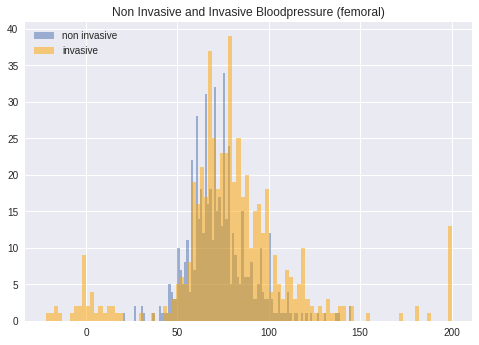

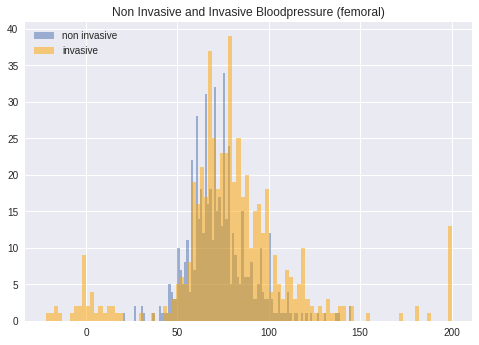

In [0]:
# Femoral
df_model = df[df['femoral_yn']==1]

np.minimum(df_model['ninv_value'], 200).hist(bins = 100, alpha = 0.5, label = 'non invasive')

np.minimum(df_model['invasive_value'], 200).hist(bins = 100, color = 'orange', alpha = 0.5, label = 'invasive')

plt.title('Non Invasive and Invasive Bloodpressure (femoral)')
plt.legend(loc = 'upper left')
plt.show()

# Radial
np.minimum(df_model['ninv_value'], 200).hist(bins = 100, alpha = 0.5, label = 'non invasive')

np.minimum(df_model['invasive_value'], 200).hist(bins = 100, color = 'orange', alpha = 0.5, label = 'invasive')

plt.title('Non Invasive and Invasive Bloodpressure (femoral)')
plt.legend(loc = 'upper left')
plt.show()

# Radial vs Femoral

In [0]:
df_plot = df_model[df_model['invasive_value'].between(20, 140)]
df_plot = df_plot[df_plot['ninv_value'].between(20, 140)]
df_plot = df_plot.drop_duplicates(subset = ['icustay_id'], keep = 'first')

df_femeralis = df_plot.loc[df_plot['femoral_yn']==1, ['invasive_value','ninv_value']]
df_radialis = df_plot.loc[df_plot['femoral_yn']==1, ['invasive_value','ninv_value']]

df_femeralis = df_femeralis.groupby('ninv_value')['invasive_value'].agg(['mean', 'std'])
df_radialis = df_radialis.groupby('ninv_value')['invasive_value'].agg(['mean', 'std'])


20


ninv_value        0.000000
pred_radial    -364.076540
pred_femoral   -334.038468
dtype: float64


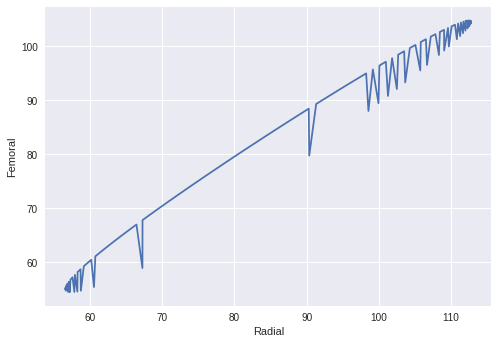

In [0]:
def calculate_pred(x, params):
  return params[3] + params[2] * x + params[1] * x*x + params[0] * x*x*x

xlabel = 'ninv_value'
ylabel = 'invasive_value'
df = pd.read_csv(os.path.join(os.getcwd(),'gdrive/My Drive/Colab Notebooks/dfmodel_with_signals.csv'))


df_model = df[df['femoral_yn']==1]
df_model = df_model[df_model['invasive_value'].between(0, 140)]
df_model = df_model[df_model['ninv_value'].between(0, 140)]
df_model = df_model.drop_duplicates(subset = ['icustay_id'], keep = 'first')
x = df_model[xlabel]
y = df_model[ylabel]

params_femoral = np.polyfit(x, y, deg=3, rcond=None, full=False, w=None, cov=False)

df_model = df[df['radial_yn']==1]
df_model = df_model[df_model['invasive_value'].between(0, 140)]
df_model = df_model[df_model['ninv_value'].between(0, 140)]
df_model = df_model.drop_duplicates(subset = ['icustay_id'], keep = 'first')
x = df_model[xlabel]
y = df_model[ylabel]

params_radial = np.polyfit(x, y, deg=3, rcond=None, full=False, w=None, cov=False)

df_model = df[df['ninv_value'].between(10,150)].copy()

df_model1 = np.round(df_model[['ninv_value']]).drop_duplicates()
df_model1['pred_radial'] = df_model1['ninv_value'].apply(lambda x: calculate_pred(x, params_radial))
df_model1['pred_femoral'] = df_model1['ninv_value'].apply(lambda x: calculate_pred(x, params_femoral))

df_model1 = df_model1.sort_values('pred_radial')
x = df_model1['pred_radial']
y = df_model1['pred_femoral']

plt.plot(x,y, '-')
plt.gca().set_xlabel('Radial')
plt.gca().set_ylabel('Femoral')
plt.show()



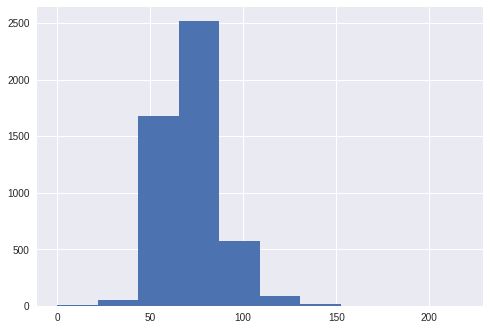

In [0]:
df['ninv_value'].hist()